The steps are broadly divided into:

Step 1: Reading and Understanding the Data

Step 2: Data Cleansing

Step 3: Data Preparation

Step 4: Model Building

Step 5: Final Analysis/Inference



# Step 1: Reading and understanding data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from kneed import KneeLocator


In [7]:
retail = pd.read_excel('/Users/navyatrilok/Documents/DATASCIENCE/Datasets/OnlineRetail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
retail.shape

(541909, 8)

In [9]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


# Step 2: Data Cleaning

In [11]:
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
# calculating missing values % in the data

In [13]:
df_null = round(100*(retail.isna().sum())/len(retail),2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [14]:
retail = retail.dropna()
retail.shape

(406829, 8)

In [15]:
retail.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
retail['CustomerID'] = retail['CustomerID'].astype(str)

# 3: Data Preparation

We are going to analyse the customer based on below 3 factors:

R(Recency): Number of days since last purchase

F(Frequency): Number of transactions

M(Monetory): Total amount of transactions (revenue contributed)


# M : Monetory

In [17]:
retail['Amount'] = retail['Quantity']*retail['UnitPrice']

In [18]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [19]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [20]:
rmf_monetory = retail[['Amount','CustomerID']].groupby('CustomerID').sum().reset_index()
rmf_monetory.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


# F : Frequency

In [21]:
rmf_frequency = retail[['CustomerID','InvoiceNo']].groupby('CustomerID').count().reset_index()
rmf_frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


# Merging rmf_frequency and rmf_monetory

In [22]:
rmf_merged = pd.merge(left=rmf_monetory,right=rmf_frequency,on='CustomerID',how='inner')
rmf_merged.head()

,CustomerID,Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [23]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [24]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [25]:
max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [26]:
retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


# Get last transaction data of the customers 

# R : Recency

In [27]:
rmf_recency = retail.groupby('CustomerID')['Diff'].min().reset_index()
rmf_recency.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [28]:
rmf_recency['Diff'] = rmf_recency['Diff'].dt.days
rmf_recency.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [29]:
rmf = pd.merge(left = rmf_merged,right=rmf_recency, on='CustomerID', how = 'inner')
rmf.columns = ['CustomerID','Amount','Frequency','Recency']
rmf.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


# Outlier Analysis

Statistically removing outliers from Amount

In [30]:
q1 = rmf.Amount.quantile(q=0.05)
q3 = rmf.Amount.quantile(q=0.95)
IQR = q3 - q1
rmf = rmf[(rmf.Amount >= q1-1.5*IQR) & (rmf.Amount <= q3+1.5*IQR)]

Statistically removing outliers from Recency

In [31]:
q1 = rmf.Recency.quantile(q=0.05)
q3 = rmf.Recency.quantile(q=0.95)
IQR = q3 - q1
rmf = rmf[(rmf.Recency >= q1-1.5*IQR) & (rmf.Recency <= q3+1.5*IQR)]

Statistically removing outliers from Frequency

In [32]:
q1 = rmf.Frequency.quantile(q=0.05)
q3 = rmf.Frequency.quantile(q=0.95)
IQR = q3 - q1
rmf = rmf[(rmf.Frequency >= q1-1.5*IQR) & (rmf.Frequency <= q3+1.5*IQR)]

In [33]:
rmf.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


# Rescaling the features

In [34]:
rmf_df = rmf[['Amount','Frequency','Recency']]

In [35]:
scaler = StandardScaler()

In [36]:
rmf_scaled = pd.DataFrame(scaler.fit_transform(rmf_df),columns=['Amount','Frequency','Recency'])
rmf_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [37]:
rmf_scaled.shape

(4293, 3)

# Step 4: Building the model

# KMeans Clustering

# Using elbow point to determine the optimal number of clusters

In [38]:
inertia = []
for k in range(2,12):
    model = KMeans(n_clusters=k)
    model.fit(rmf_scaled)
    inertia.append(model.inertia_)

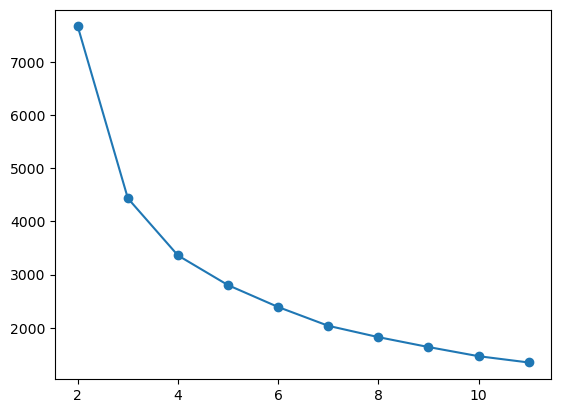

In [229]:
plt.plot(range(2,12),inertia,marker='o')

In [230]:
k1 = KneeLocator(x=range(2,12),y=inertia,curve='convex',direction='decreasing')
k1.elbow

4

In [231]:
inertia

[7661.701161911667,
 4433.580619302121,
 3360.719102577021,
 2802.824128483466,
 2392.115318228375,
 2039.2733672074603,
 1826.3444226173942,
 1640.4634245850464,
 1468.3647777135577,
 1350.3904076779347]

Kneelocator is suggesting 4 but looking at inertia numbers I think 3 would be the right number of clusters

In [86]:
model = KMeans(n_clusters=3)
model.fit(rmf_scaled)
clusters = model.predict(rmf_scaled)
clusters

array([0, 2, 1, ..., 0, 1, 1], dtype=int32)

In [87]:
rmf['ClusterId'] = clusters
rmf.head()

,CustomerID,Amount,Frequency,Recency,ClusterId
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,0


In [88]:
model.cluster_centers_

array([[-0.50237552, -0.51846606,  1.54212771],
       [-0.18199972, -0.17959307, -0.47579335],
       [ 2.06497258,  2.08622573, -0.70091104]])

/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 85.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 89.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 88.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/navyatrilok/opt/anaconda3

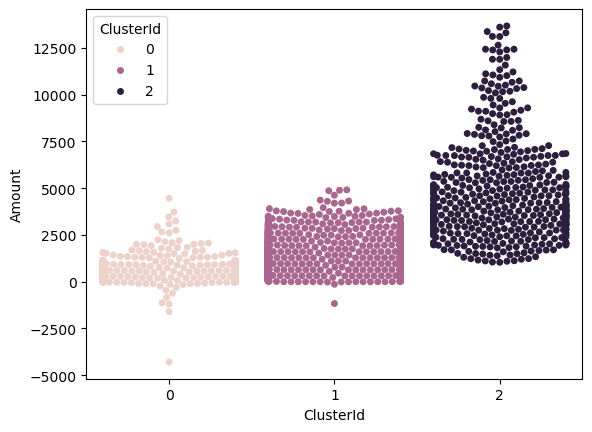

In [89]:
sns.swarmplot(x='ClusterId',y='Amount',data=rmf,hue=rmf['ClusterId'])
plt.show()

/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 80.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 84.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 84.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 88.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/navyatrilok/opt/anaconda3

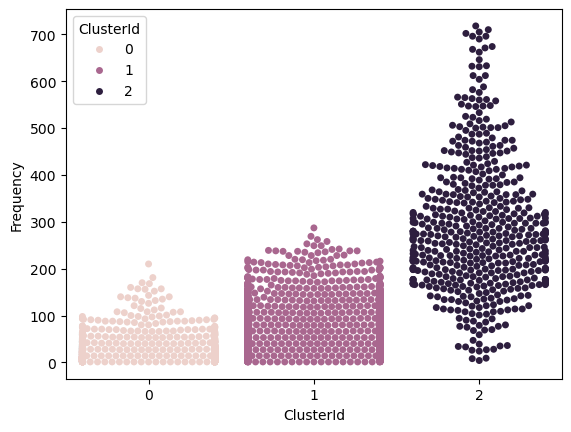

In [90]:
sns.swarmplot(x='ClusterId',y='Frequency',data=rmf,hue=rmf['ClusterId'])
plt.show()

/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 80.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 50.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/navyatrilok/opt/anaconda3

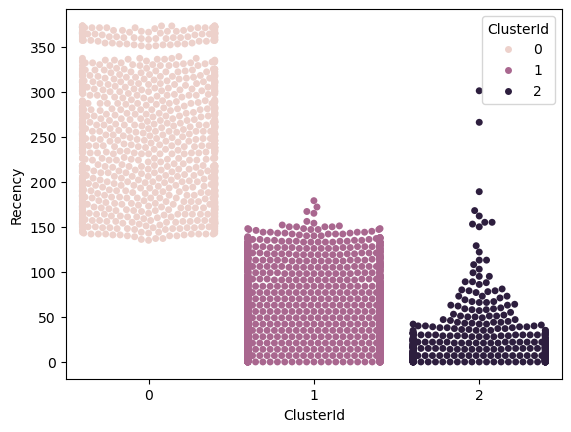

In [91]:
sns.swarmplot(x='ClusterId',y='Recency',data=rmf,hue=rmf['ClusterId'])
plt.show()

In [92]:
centers = model.cluster_centers_
centers

array([[-0.50237552, -0.51846606,  1.54212771],
       [-0.18199972, -0.17959307, -0.47579335],
       [ 2.06497258,  2.08622573, -0.70091104]])

In [93]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Amount','Frequency','Recency'])
centers

,Amount,Frequency,Recency
0,-0.502376,-0.518466,1.542128
1,-0.182000,-0.179593,-0.475793
2,2.064973,2.086226,-0.700911


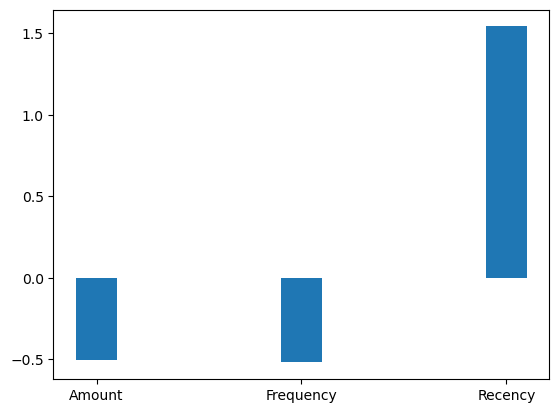

In [94]:
plt.bar(x=centers.columns,height=centers.iloc[0],width=0.2)
plt.show()

In cluster 0 Recency is on +ve side

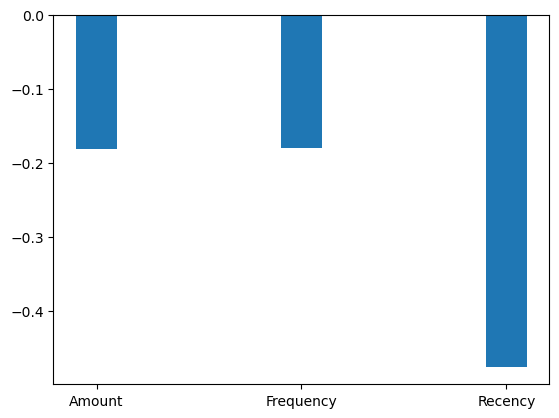

In [95]:
plt.bar(x=centers.columns,height=centers.iloc[1],width=0.2)
plt.show()


In cluster 1 all are on negative side

Business should concentrate more on the cluster 2

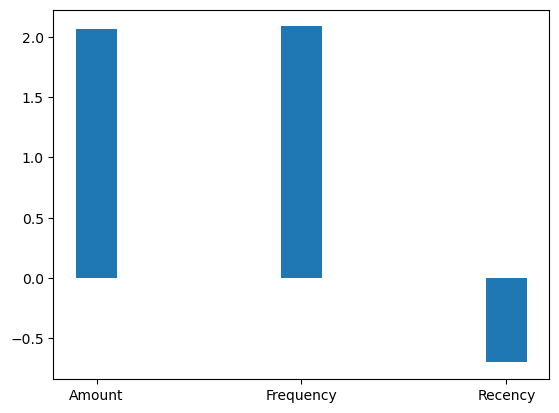

In [96]:
plt.bar(x=centers.columns,height=centers.iloc[2],width=0.2)
plt.show()

In cluster 2 only recency is on negative side, amount and frequency are on positive side

# Step 5: Extrating insights from these cluster centers

Cluster 0, cluster 1, cluster 2
Recency               Amount
                      Frequency 

# Inference:
K-Means Clustering with 3 Cluster Ids

Customers with Cluster Id 2 are the customers with high amount of transactions as compared to other customers.

Customers with Cluster Id 2 are frequent buyers.

Customers with Cluster Id 0 are not recent buyers and hence business should introduce ad compaigns or personalized offers to attract these churning customers. This group is more important than the other 2 clusters for the business
to improve sales.

Customers with Cluster 1 are the customers all(recen) on negative side compared to the respective mean

# Metrics

- Revenue per Visitor (RPV): Measures the revenue generated per customer visit.
- Average Order Value (AOV): The average dollar amount spent each time a customer places an order.
- Conversion Rate: The percentage of visitors who make a purchase.
- Stock Turnover Ratio: How quickly inventory is sold and replaced over a specific period.
- Gross Margin Return on Investment (GMROI): Measures the profitability of inventory.

# Revenue per Visitor (RPV):

RPV = Total Revenue / Total Number of Visitors

In [172]:
rmf

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4366,18278.0,173.90,9,73
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7


In [173]:
rmf.Amount.sum()

5453876.414

In [174]:
rmf.CustomerID.count()

4293

In [176]:
5453876.414/4293

1270.4114637782436

## RPV = $1270.41

# Average Order Value (AOV):
    
AOV = Total Revenue / Total Number of Orders
    

In [183]:
rmf.Amount.sum()

5453876.414

In [182]:
rmf.Frequency.sum()

332637

In [184]:
5453876.414/332637

16.395880235812612

## AOV = 16.39

# Stock Turnover Ratio

Stock Turnover Ratio = Cost of Goods Sold (COGS)/ Average Inventory 

Note: Here we do not know the cost of goods sold, for now I am considering CP == SP, which shouldn't be the case, but I just want to work on this metric too in this case study

In [189]:
Cost_of_Goods_Sold = rmf.Amount.sum()
Cost_of_Goods_Sold

5453876.414

In [191]:
retail.StockCode.count()

406829

In [192]:
5453876.414/406829

13.405820170145196

## Stock Turnover Ratio = 13.4%

# Gross Margin Return on Investment (GMROI)

## GMROI= Gross Profit / Average Inventory Cost
